In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df= pd.read_csv('mymoviedb.csv', lineterminator='\n')


In [47]:
df.head()  

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df.describe()


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary
1. We have a dataframe with 9827 rows and 9 columns
2. dataset has no NANs or duplicate values
3. Released date column is Object type and needs to be casted in date time and extract year from it only
4. Overview, original language and url are not useful for the analysis so we'll drop them
5. there is noticeable outliers in popularity column
6. Vote_average better be categorised for proper analysis
7. Genre column has comma seperated values and white spaces that needs to be handled and casted into category.exploration summary
   

Converting release date from object to date time and extracting year from it

In [51]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [52]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [53]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping unnecessary columns

In [54]:
cols=['Overview','Poster_Url']
df.drop(cols,axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

In [55]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


**Categorizing Vote_Average Column**
We should replace the vote average values with 4 categories 'popular' , 'average' , 'below_avg', 'not_popular' to describe it more properly using a user defined function **categorize_col()**

In [56]:
def categorize_col(df, col, labels):
    # Get the bin edges
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    
    # Ensure bin edges are unique and sorted
    edges = sorted(list(set(edges)))
    
    # Adjust labels if there are fewer bins than labels
    if len(edges) - 1 < len(labels):
        labels = labels[:len(edges) - 1]
    
    # Apply pd.cut with the adjusted edges and labels
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop', include_lowest=True)
    
    return df

In [57]:
labels=['not_popular','below_avg','average','popular']

categorize_col(df,'Vote_Average',labels)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [58]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,en,Thriller
3,2021,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War"


In [59]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2567
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

removing nan values from the dataset if there are any

In [60]:
df.dropna(inplace=True)

In [61]:
df.isna().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [62]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,en,Thriller
3,2021,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War"


removing comma and white spaces and sepearting each moving with each genres in diff line  y using **explode** fxn which are there in one line right now


In [63]:
df['Genre']=df['Genre'].str.split(', ')
df= df.explode('Genre').reset_index(drop=True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


In [64]:
#casting column genre into category
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25793 non-null  int32   
 1   Title              25793 non-null  object  
 2   Popularity         25793 non-null  float64 
 3   Vote_Count         25793 non-null  int64   
 4   Vote_Average       25793 non-null  category
 5   Original_Language  25793 non-null  object  
 6   Genre              25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(2)
memory usage: 958.2+ KB


In [66]:
df.nunique()


Release_Date          102
Title                9513
Popularity           8160
Vote_Count           3266
Vote_Average            4
Original_Language      43
Genre                  19
dtype: int64

In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [67]:
df['Original_Language'].describe()

count     25793
unique       43
top          en
freq      20019
Name: Original_Language, dtype: object

# Data Visualization

In [27]:
sns.set_style('whitegrid')

# Ques1: What is the most frequent Genre of movies released on Netflix

In [28]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

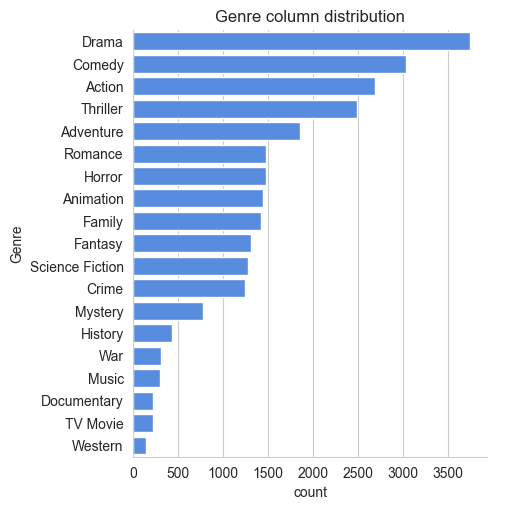

In [30]:
sns.catplot(y='Genre', data=df, kind='count', 
            order=df['Genre'].value_counts().index,
            color='#4287f5')
plt.title("Genre column distribution")
plt.show()

# Ques2: Which has highest votes in vote avg column

In [32]:
df['Vote_Average'].describe()

count       25793
unique          4
top       average
freq         6613
Name: Vote_Average, dtype: object

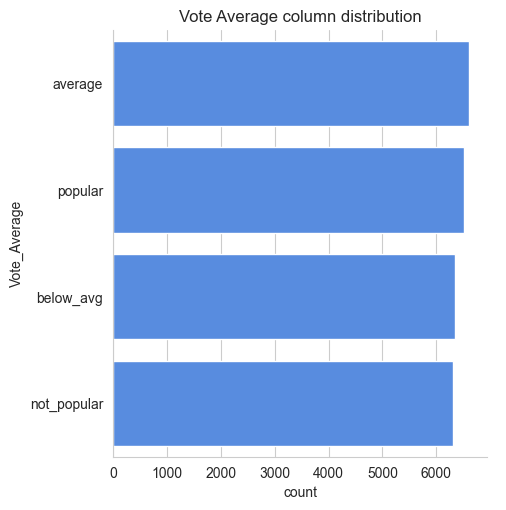

In [34]:
sns.catplot(y='Vote_Average',data=df,kind='count',
           order=df['Vote_Average'].value_counts().index,
           color='#4287f5')
           
plt.title("Vote Average column distribution")
plt.show()

# Ques3: Which movie got the highest popularity and what is its Genre

In [35]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [36]:
df['Popularity'].describe()

count    25793.000000
mean        42.001288
std        113.341050
min         13.354000
25%         16.366000
50%         21.865000
75%         36.503000
max       5083.954000
Name: Popularity, dtype: float64

In [38]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# Ques4: Which movie has the lowest popularity and what is its genre

In [39]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


# Ques5: Which year has the most filmed movies

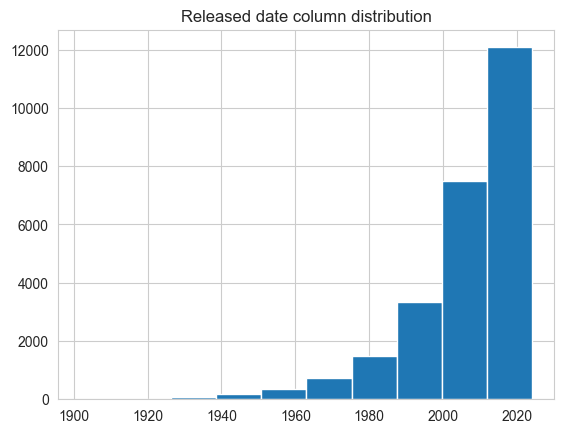

In [40]:
df['Release_Date'].hist()
plt.title("Released date column distribution")
plt.show()

# Conclusion

**Q1: What is the most frequent genre of movies in the dataset?** 
The genre **Drama** is the most frequent genre in the dataset and has appeared more than **14%** among **19** other genres.

**Q2: What genre has highst votes?**
We have **25.5%** of our dataset with **popular** votes (6520 rows). **Drama** again gets the highest popularity among fans by having **more than 18.5%** of movie popularity.

**Q3: Which movie has the highest popularity? What is it's genre?**
**Spider Man: No Way Home** has the highest popularity in our data set and has the genres: Action, Adventure and Science Fiction.

**Q4: Which movie has the lowest popularity? What is it's genre?**
**The United States** and **Thread** has the lowest popularity among all and has genres: Music, Drama, War, Science Fiction and History.

**Q5: Which year has the most filmed movies?**
The year **2020** has the highest filming rate of all years in our dataset.